In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
optimum = {}

best = pd.read_csv('data/find_best.csv')
for ((size, pin), group) in best.groupby(['size', 'pin']):
    best_energy = group['energy'].min()
    best_row = group[group['energy'].eq(best_energy)].iloc[0]
    optimum[(int(size),bool(pin))] = int(best_row['threads'])

print(optimum)

{(500, False): 16, (500, True): 16, (550, False): 16, (550, True): 16, (600, False): 16, (600, True): 16, (650, False): 15, (650, True): 16, (700, False): 15, (700, True): 16, (750, False): 15, (750, True): 16, (800, False): 16, (800, True): 16, (850, False): 14, (850, True): 15, (900, False): 16, (900, True): 16, (950, False): 16, (950, True): 15, (1000, False): 16, (1000, True): 16, (1050, False): 16, (1050, True): 16, (1100, False): 8, (1100, True): 12, (1150, False): 15, (1150, True): 14, (1200, False): 9, (1200, True): 12, (1250, False): 8, (1250, True): 12, (1500, False): 8, (1500, True): 12, (1750, False): 8, (1750, True): 12, (2000, False): 8, (2000, True): 12, (2250, False): 8, (2250, True): 12, (2500, False): 8, (2500, True): 12}


In [29]:
fast = pd.read_csv('data/adapt_fast.csv')
slow = pd.read_csv('data/adapt_slow.csv')
slow

,size,pin,threads,runtime,usertime,energy
0,800,False,16,0.198641,3.108179,8.652199
1,800,False,16,0.199500,3.112759,8.765603
2,800,False,16,0.198639,3.123270,8.645242
3,800,False,16,0.197964,3.110667,8.633096
4,800,False,16,0.197777,3.111436,8.604714
...,...,...,...,...,...,...
1812,1250,False,11,0.896041,9.793362,38.574791
1813,1250,False,11,0.922776,9.989512,39.834432
1814,1250,False,11,0.906018,9.845064,38.892479
1815,1250,False,11,0.895854,9.789418,38.562707


In [30]:
fast['optimum'] = fast.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)
slow['optimum'] = slow.apply(lambda x: optimum[(x['size'], x['pin'])], axis=1)

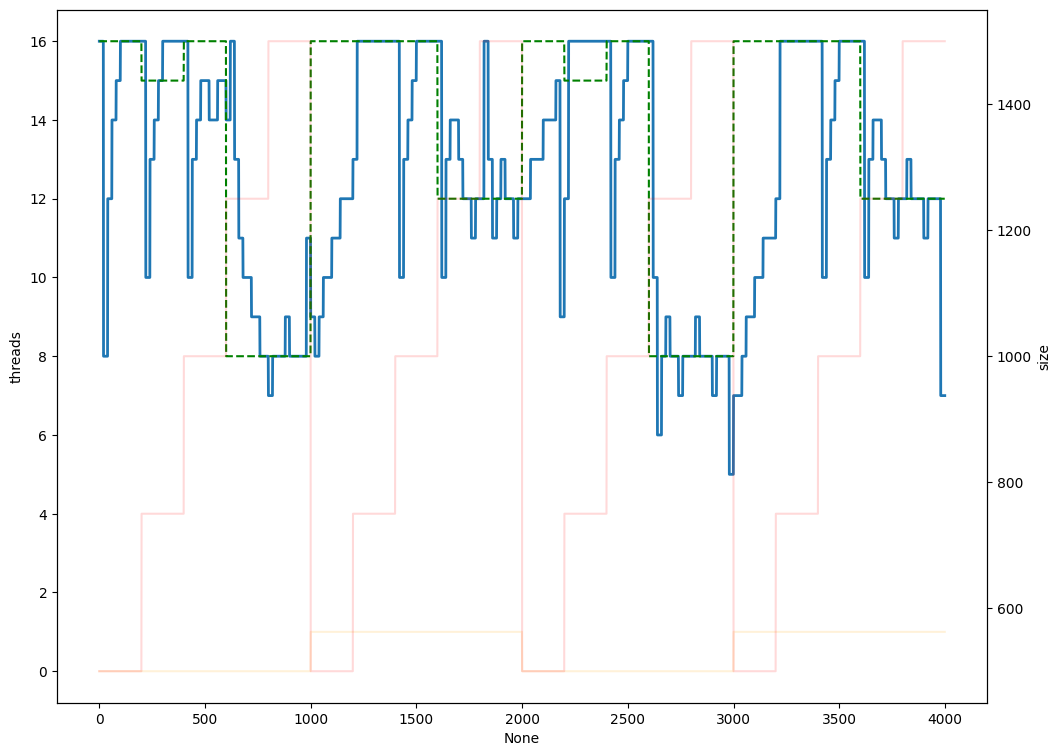

In [31]:
plt.figure(figsize=(12,9))

x = fast.index

ax = sns.lineplot(x=x, y=fast['threads'], linewidth=2)
sns.lineplot(x=x, y=fast['optimum'], color='g', linestyle='--', ax=ax)

sns.lineplot(x=x, y=fast['pin'], color='orange', alpha=0.15, ax=ax)

ax2 = ax.twinx()

sns.lineplot(x=x, y=fast['size'], color='r', alpha=0.15, ax=ax2)

plt.savefig('images/adapt_fast.png')
plt.show()

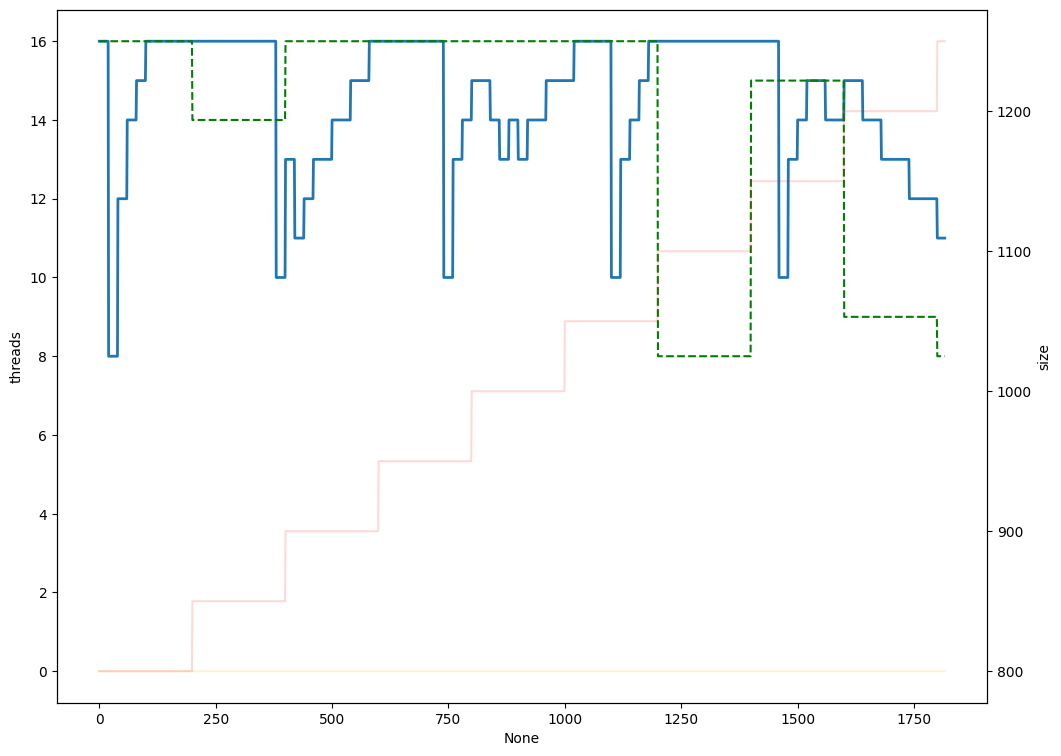

In [32]:
plt.figure(figsize=(12,9))

x = slow.index

ax = sns.lineplot(x=x, y=slow['threads'], linewidth=2)
sns.lineplot(x=x, y=slow['optimum'], color='g', linestyle='--', ax=ax)

sns.lineplot(x=x, y=slow['pin'], color='orange', alpha=0.15, ax=ax)

ax2 = ax.twinx()

sns.lineplot(x=x, y=slow['size'], color='r', alpha=0.15, ax=ax2)

plt.savefig('images/adapt_slow.png')
plt.show()

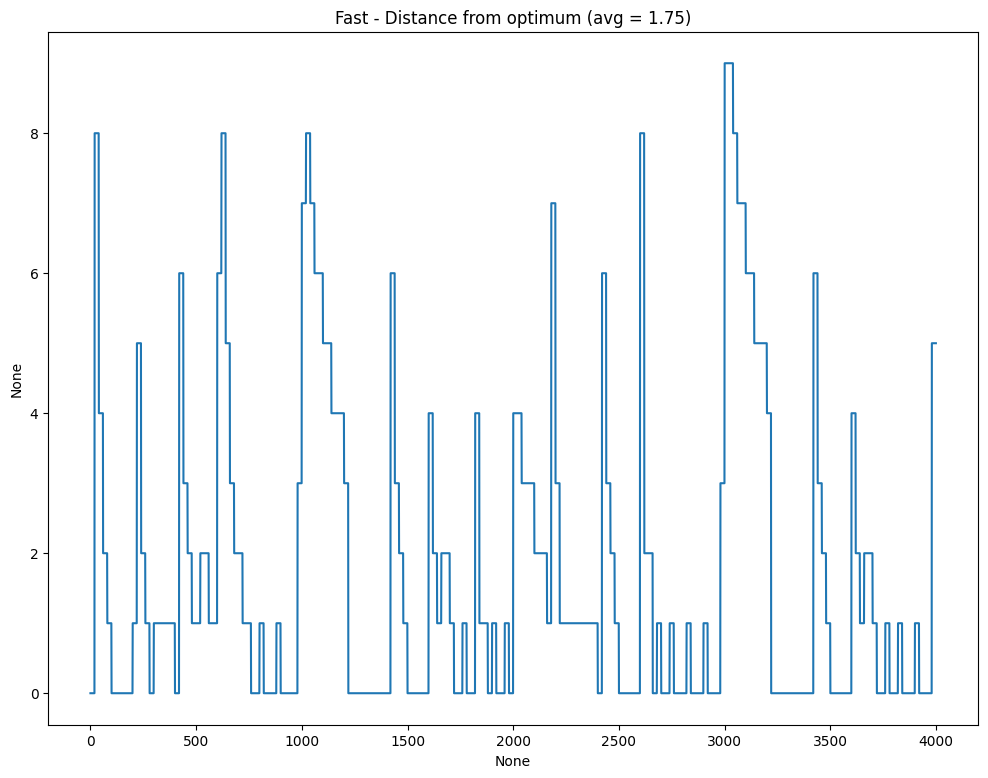

In [33]:
plt.figure(figsize=(12,9))
dt = fast['threads'].sub(fast['optimum']).abs()
sns.lineplot(x=fast.index, y=dt)
plt.title(f'Fast - Distance from optimum (avg = {dt.sum() / len(dt)})')
plt.show()

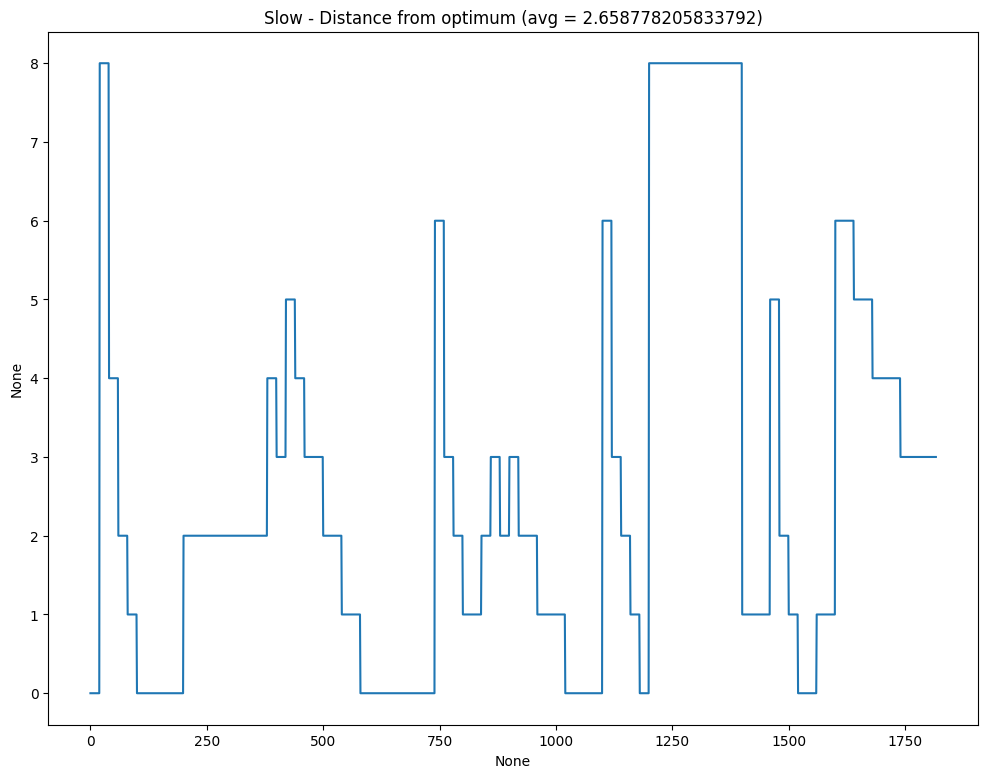

In [34]:
plt.figure(figsize=(12,9))
dt = slow['threads'].sub(slow['optimum']).abs()
sns.lineplot(x=slow.index, y=dt)
plt.title(f'Slow - Distance from optimum (avg = {dt.sum() / len(dt)})')
plt.show()